## Presence of Sugar and Implications on Health in Various Countries


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data for this report was pulled from Gapminder World, a database which holds various indicators related to the lifestyles of people around the world. This report specifically looks at the following indiactors: Sugar Per Person, Average Male Blood Pressure, Average Female Blood Pressure, Average Male Body Mass Index (BMI), and Average Female BMI. 

The Sugar Per Person indicator will be compared against the Blood Pressure and BMI indicators to determine the extent of the effect the amount of sugar in a country has on overall health. A high sugar diet can lead to high blood pressure and a high BMI, so this report will examine the effect on a country as a whole. Health issues are said to be very prevalent in the United States. This report will be used to determine whether the amount of sugar in the U.S. is a contributing factor. The data from the United States will be compared to the rest of the world. 

In [ ]:
# Import necessary packages for data exploration

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

Load and view the first few lines of the first file. 

In [5]:
df_sugar = pd.read_csv('sugar.csv')
df_sugar.head()

,geo,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,14.4,12.8,13.2,15.5,16.3,16.7,17.4,17.8,14.5,...,15.5,18.6,19.7,20.8,23.4,23.3,24.3,24.8,25.4,24.5
1,Albania,31.0,31.8,34.3,36.6,37.0,37.7,38.3,38.6,40.9,...,55.0,58.6,67.2,75.5,102.0,117.0,113.0,122.0,129.0,131.0
2,Algeria,45.0,47.0,45.3,46.7,43.7,45.1,47.3,48.1,45.8,...,84.3,75.5,77.9,86.7,78.5,85.3,85.6,74.9,82.8,78.2
3,Angola,25.2,30.6,33.6,29.5,29.5,28.9,29.4,34.5,30.0,...,39.3,37.1,38.3,39.5,44.1,40.2,38.9,40.1,42.7,44.7
4,Antigua and Barbuda,1140.0,1160.0,1410.0,1080.0,764.0,492.0,350.0,188.0,311.0,...,93.1,79.7,85.0,87.3,89.2,87.6,87.6,79.6,87.9,90.1


In [7]:
df_sugar.shape

(168, 54)

In [8]:
df_sugar.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,166.000000,166.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,69.183617,71.172340,72.386454,71.247801,71.573688,70.744681,70.637092,70.615957,72.440780,73.613688,...,82.748434,82.497169,82.843571,83.695476,84.071964,83.516071,83.254762,83.623810,84.061905,84.483333
std,100.739890,102.085859,121.286431,95.896194,73.170763,56.748181,49.578497,44.770897,48.372765,48.850009,...,44.318657,43.616605,42.511986,42.638979,42.728215,42.937578,42.408040,42.302669,42.266732,42.046435
min,0.000000,0.000000,0.090000,0.440000,0.830000,1.680000,2.640000,3.020000,3.400000,2.630000,...,3.290000,5.210000,7.360000,8.240000,8.790000,11.900000,10.400000,11.400000,10.800000,10.800000
25%,25.200000,27.100000,27.300000,28.900000,32.400000,28.200000,32.800000,34.500000,32.700000,34.700000,...,43.700000,44.175000,44.800000,48.100000,47.550000,44.700000,45.825000,46.175000,47.225000,47.925000
50%,56.700000,63.500000,63.600000,62.900000,67.500000,67.800000,71.300000,70.500000,71.700000,74.600000,...,84.350000,84.150000,85.000000,86.150000,86.000000,83.950000,85.050000,83.600000,87.200000,87.050000
75%,95.600000,96.400000,94.200000,98.700000,95.500000,101.000000,102.000000,105.000000,105.000000,109.000000,...,113.750000,114.750000,115.250000,116.250000,117.500000,117.250000,117.250000,118.500000,119.250000,118.000000
max,1140.000000,1160.000000,1410.000000,1080.000000,764.000000,492.000000,350.000000,188.000000,311.000000,324.000000,...,194.000000,193.000000,187.000000,175.000000,171.000000,174.000000,171.000000,172.000000,174.000000,175.000000


In [9]:
df_sugar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 54 columns):
geo     168 non-null object
1961    141 non-null float64
1962    141 non-null float64
1963    141 non-null float64
1964    141 non-null float64
1965    141 non-null float64
1966    141 non-null float64
1967    141 non-null float64
1968    141 non-null float64
1969    141 non-null float64
1970    141 non-null float64
1971    141 non-null float64
1972    141 non-null float64
1973    141 non-null float64
1974    141 non-null float64
1975    141 non-null float64
1976    141 non-null float64
1977    141 non-null float64
1978    141 non-null float64
1979    141 non-null float64
1980    141 non-null float64
1981    141 non-null float64
1982    141 non-null float64
1983    141 non-null float64
1984    141 non-null float64
1985    141 non-null float64
1986    141 non-null float64
1987    141 non-null float64
1988    141 non-null float64
1989    141 non-null float64
1990    142 non-null float

This csv file provides the amount of sugar and sweeteners consumed per person each day in a given country. There are 168 countries included. It appears there are multiple years that have missing values, so the data will need some cleaning. 

In [6]:
#Load and preview csv file for female BMI
df_bmi_women = pd.read_csv('bmi_women.csv')
df_bmi_women.head()

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,20.4,20.5,20.5,20.6,20.6,20.6,20.7,20.7,20.7,...,20.6,20.6,20.6,20.6,20.7,20.8,20.8,20.9,21.0,21.1
1,Albania,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,...,25.1,25.1,25.2,25.3,25.3,25.4,25.5,25.5,25.6,25.7
2,Algeria,23.7,23.8,23.9,24.0,24.1,24.2,24.3,24.4,24.5,...,25.4,25.5,25.6,25.7,25.8,25.9,26.0,26.1,26.3,26.4
3,Andorra,25.7,25.7,25.7,25.7,25.7,25.7,25.7,25.7,25.8,...,26.1,26.1,26.1,26.2,26.2,26.3,26.3,26.4,26.4,26.4
4,Angola,20.1,20.1,20.2,20.3,20.3,20.4,20.5,20.6,20.7,...,21.8,21.9,22.1,22.3,22.4,22.6,22.8,23.0,23.3,23.5


In [10]:
df_bmi_women.shape

(189, 30)

In [11]:
df_bmi_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
geo     189 non-null object
1980    189 non-null float64
1981    189 non-null float64
1982    189 non-null float64
1983    189 non-null float64
1984    189 non-null float64
1985    189 non-null float64
1986    189 non-null float64
1987    189 non-null float64
1988    189 non-null float64
1989    189 non-null float64
1990    189 non-null float64
1991    189 non-null float64
1992    189 non-null float64
1993    189 non-null float64
1994    189 non-null float64
1995    189 non-null float64
1996    189 non-null float64
1997    189 non-null float64
1998    189 non-null float64
1999    189 non-null float64
2000    189 non-null float64
2001    189 non-null float64
2002    189 non-null float64
2003    189 non-null float64
2004    189 non-null float64
2005    189 non-null float64
2006    189 non-null float64
2007    189 non-null float64
2008    189 non-null float64
dtypes: float64(29), objec

This csv file provides the mean Body Mass Index(BMI) of the female population for 189 different countries. This is measured in kilograms per square meter. There are no null values in this dataset. 

In [7]:
#Load and preview csv file for male BMI
df_bmi_men = pd.read_csv('bmi_men.csv')
df_bmi_men.head()

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,21.5,21.5,21.4,21.4,21.4,21.4,21.4,21.4,21.3,...,20.8,20.7,20.6,20.6,20.6,20.6,20.6,20.6,20.6,20.6
1,Albania,25.2,25.2,25.3,25.3,25.3,25.3,25.3,25.3,25.3,...,25.5,25.6,25.7,25.8,25.9,26.0,26.1,26.2,26.3,26.4
2,Algeria,22.3,22.4,22.4,22.5,22.6,22.7,22.8,22.8,22.9,...,23.7,23.8,23.9,23.9,24.1,24.2,24.3,24.4,24.5,24.6
3,Andorra,25.7,25.7,25.8,25.8,25.8,25.9,25.9,25.9,26.0,...,26.8,26.8,26.9,27.0,27.1,27.2,27.3,27.4,27.5,27.6
4,Angola,20.9,20.9,20.9,20.9,20.9,20.9,21.0,21.0,21.0,...,21.3,21.4,21.4,21.5,21.6,21.7,21.8,21.9,22.1,22.3


In [12]:
df_bmi_men.shape

(189, 30)

In [13]:
df_bmi_men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
geo     189 non-null object
1980    189 non-null float64
1981    189 non-null float64
1982    189 non-null float64
1983    189 non-null float64
1984    189 non-null float64
1985    189 non-null float64
1986    189 non-null float64
1987    189 non-null float64
1988    189 non-null float64
1989    189 non-null float64
1990    189 non-null float64
1991    189 non-null float64
1992    189 non-null float64
1993    189 non-null float64
1994    189 non-null float64
1995    189 non-null float64
1996    189 non-null float64
1997    189 non-null float64
1998    189 non-null float64
1999    189 non-null float64
2000    189 non-null float64
2001    189 non-null float64
2002    189 non-null float64
2003    189 non-null float64
2004    189 non-null float64
2005    189 non-null float64
2006    189 non-null float64
2007    189 non-null float64
2008    189 non-null float64
dtypes: float64(29), objec

This csv file provides the mean Body Mass Index(BMI) of the male population for 189 different countries. This is measured in kilograms per square meter. There are no null values in this dataset. 

In [8]:
#Load and preview csv file for female blood pressure 
df_bp_women = pd.read_csv('blood_pressure_women.csv')
df_bp_women.head()

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,122,122,123,123,123,123,123,123,124,...,124,124,124,124,124,125,125,125,125,125
1,Albania,132,132,132,132,132,132,132,131,131,...,129,129,129,129,129,129,129,129,129,129
2,Algeria,131,131,131,131,131,131,131,131,131,...,131,131,130,130,130,130,130,130,130,130
3,Andorra,137,136,135,135,134,133,133,132,132,...,126,126,125,125,124,124,123,123,122,122
4,Angola,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130


In [14]:
df_bp_women.shape

(189, 30)

In [15]:
df_bp_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
geo     189 non-null object
1980    189 non-null int64
1981    189 non-null int64
1982    189 non-null int64
1983    189 non-null int64
1984    189 non-null int64
1985    189 non-null int64
1986    189 non-null int64
1987    189 non-null int64
1988    189 non-null int64
1989    189 non-null int64
1990    189 non-null int64
1991    189 non-null int64
1992    189 non-null int64
1993    189 non-null int64
1994    189 non-null int64
1995    189 non-null int64
1996    189 non-null int64
1997    189 non-null int64
1998    189 non-null int64
1999    189 non-null int64
2000    189 non-null int64
2001    189 non-null int64
2002    189 non-null int64
2003    189 non-null int64
2004    189 non-null int64
2005    189 non-null int64
2006    189 non-null int64
2007    189 non-null int64
2008    189 non-null int64
dtypes: int64(29), object(1)
memory usage: 44.4+ KB


This csv file provides the mean systolic blood pressure(SBP) of the female population for 189 different countries. This is measured in mm-Hg. There are no null values in this dataset. 

In [9]:
#Load and preview csv file for male blood pressure
df_bp_men = pd.read_csv('blood_pressure_men.csv')
df_bp_men.head()

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,126,126
1,Albania,133,133,133,133,133,133,133,133,133,...,132,132,132,133,133,133,133,133,134,134
2,Algeria,132,132,132,132,132,131,131,131,131,...,129,129,129,129,130,130,130,130,130,130
3,Andorra,141,140,139,139,138,137,137,136,136,...,133,133,133,133,132,132,132,132,132,132
4,Angola,135,135,135,134,134,134,134,134,134,...,132,132,133,133,133,133,133,133,133,134


In [16]:
df_bp_men.shape

(189, 30)

In [17]:
df_bp_men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
geo     189 non-null object
1980    189 non-null int64
1981    189 non-null int64
1982    189 non-null int64
1983    189 non-null int64
1984    189 non-null int64
1985    189 non-null int64
1986    189 non-null int64
1987    189 non-null int64
1988    189 non-null int64
1989    189 non-null int64
1990    189 non-null int64
1991    189 non-null int64
1992    189 non-null int64
1993    189 non-null int64
1994    189 non-null int64
1995    189 non-null int64
1996    189 non-null int64
1997    189 non-null int64
1998    189 non-null int64
1999    189 non-null int64
2000    189 non-null int64
2001    189 non-null int64
2002    189 non-null int64
2003    189 non-null int64
2004    189 non-null int64
2005    189 non-null int64
2006    189 non-null int64
2007    189 non-null int64
2008    189 non-null int64
dtypes: int64(29), object(1)
memory usage: 44.4+ KB


This csv file provides the mean systolic blood pressure(SBP) of the male population for 189 different countries. This is measured in mm-Hg. There are no null values in this dataset. 



### Data Cleaning 

Drop date ranges from sugar Dataframe so that it matches up with the date ranges of the other Dataframes. The Dataframes all range from 1980 to 2008, so the dates outside of that range in the sugar dataframe will be dropped. 

In [10]:
#Drop 1961-1978
drop_index = np.arange(1, 20)

In [11]:
df_sugar.drop(df_sugar.columns[drop_index], axis=1, inplace=True)
df_sugar.head()

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,20.2,16.7,20.2,25.1,23.8,19.7,20.3,20.6,20.8,...,15.5,18.6,19.7,20.8,23.4,23.3,24.3,24.8,25.4,24.5
1,Albania,46.9,46.4,46.4,45.3,45.1,44.8,48.2,47.6,48.3,...,55.0,58.6,67.2,75.5,102.0,117.0,113.0,122.0,129.0,131.0
2,Algeria,80.4,79.3,73.3,79.4,79.0,78.7,82.8,89.9,76.2,...,84.3,75.5,77.9,86.7,78.5,85.3,85.6,74.9,82.8,78.2
3,Angola,41.7,33.7,32.0,29.1,28.3,29.3,29.2,28.5,28.0,...,39.3,37.1,38.3,39.5,44.1,40.2,38.9,40.1,42.7,44.7
4,Antigua and Barbuda,95.7,110.0,96.7,80.8,74.6,78.1,79.2,69.7,84.3,...,93.1,79.7,85.0,87.3,89.2,87.6,87.6,79.6,87.9,90.1


In [12]:
#Drop 2009-2013
drop_index_2 = np.arange(30, 35)
df_sugar.drop(df_sugar.columns[drop_index_2], axis=1, inplace=True)

Because we have enough countries to use in comparison to the United States, we can drop the countries with null values, rather than attemoting to fill the null values. 

In [13]:
df_sugar.dropna(axis=0, inplace = True)

In [14]:
#Confirm the null rows were deleted 
df_sugar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 167
Data columns (total 30 columns):
geo     141 non-null object
1980    141 non-null float64
1981    141 non-null float64
1982    141 non-null float64
1983    141 non-null float64
1984    141 non-null float64
1985    141 non-null float64
1986    141 non-null float64
1987    141 non-null float64
1988    141 non-null float64
1989    141 non-null float64
1990    141 non-null float64
1991    141 non-null float64
1992    141 non-null float64
1993    141 non-null float64
1994    141 non-null float64
1995    141 non-null float64
1996    141 non-null float64
1997    141 non-null float64
1998    141 non-null float64
1999    141 non-null float64
2000    141 non-null float64
2001    141 non-null float64
2002    141 non-null float64
2003    141 non-null float64
2004    141 non-null float64
2005    141 non-null float64
2006    141 non-null float64
2007    141 non-null float64
2008    141 non-null float64
dtypes: float64(29), objec

Now we will create single column for countries. This will be used for the purpose of merging with the remaining dataframes. This will ensure that the same countries are present in each dataset.

In [24]:
df_countries = df_sugar[['geo', '1980']].copy()
df_countries.rename(columns = (lambda x: x[:5] + '_sugar'), inplace = True )
df_countries.head(2)

,geo_sugar,1980_sugar
0,Afghanistan,20.2
1,Albania,46.9


In [17]:
#Merge df_countries with a dataframe to test this process
df_bmi_women_edit = df_bmi_women.merge(df_countries, left_on ='geo', right_on = 'geo_sugar', how = 'right')
df_bmi_women_edit.head()

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2001,2002,2003,2004,2005,2006,2007,2008,geo_sugar,1980_sugar
0,Afghanistan,20.4,20.5,20.5,20.6,20.6,20.6,20.7,20.7,20.7,...,20.6,20.6,20.7,20.8,20.8,20.9,21.0,21.1,Afghanistan,20.2
1,Albania,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,...,25.2,25.3,25.3,25.4,25.5,25.5,25.6,25.7,Albania,46.9
2,Algeria,23.7,23.8,23.9,24.0,24.1,24.2,24.3,24.4,24.5,...,25.6,25.7,25.8,25.9,26.0,26.1,26.3,26.4,Algeria,80.4
3,Angola,20.1,20.1,20.2,20.3,20.3,20.4,20.5,20.6,20.7,...,22.1,22.3,22.4,22.6,22.8,23.0,23.3,23.5,Angola,41.7
4,Antigua and Barbuda,24.2,24.3,24.4,24.6,24.7,24.9,25.0,25.2,25.4,...,26.7,26.8,26.9,27.0,27.1,27.2,27.4,27.5,Antigua and Barbuda,95.7


In [18]:
#Merge remaining dataframes to match all countries
df_bmi_men_edit = df_bmi_men.merge(df_countries, left_on ='geo', right_on = 'geo_sugar', how = 'right')
df_bp_women_edit = df_bp_women.merge(df_countries, left_on ='geo', right_on = 'geo_sugar', how = 'right')
df_bp_men_edit = df_bp_men.merge(df_countries, left_on ='geo', right_on = 'geo_sugar', how = 'right')

In [20]:
#Drop unneccessary columns from merge
df_bmi_men_edit.drop(['geo_sugar', '1980_sugar'], axis=1, inplace=True)
df_bp_women_edit.drop(['geo_sugar', '1980_sugar'], axis=1, inplace=True)
df_bp_men_edit.drop(['geo_sugar', '1980_sugar'], axis=1, inplace=True)
df_bmi_women_edit.drop(['geo_sugar', '1980_sugar'], axis=1, inplace=True)

In [21]:
#Check to make sure the columns were dropped properly
df_bmi_men2.head(2)

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,21.5,21.5,21.4,21.4,21.4,21.4,21.4,21.4,21.3,...,20.8,20.7,20.6,20.6,20.6,20.6,20.6,20.6,20.6,20.6
1,Albania,25.2,25.2,25.3,25.3,25.3,25.3,25.3,25.3,25.3,...,25.5,25.6,25.7,25.8,25.9,26.0,26.1,26.2,26.3,26.4


In [23]:
#Save clean files to csv to continue working with them
df_sugar.to_csv('df_sugar_clean', index=False)
df_bmi_men_edit.to_csv('df_bmi_men_clean', index=False)
df_bmi_women_edit.to_csv('df_bmi_women_clean', index=False)
df_bp_men_edit.to_csv('df_bp_men_clean', index=False)
df_bp_women_edit.to_csv('df_bp_women_clean', index=False)

In [ ]:
#Load clean files 
df_sugar2 = pd.read_csv('df_sugar_clean')
df_bmi_men2 =pd.read_csv('df_bmi_men_clean')
df_bmi_women2 =pd.read_csv('df_bmi_women_clean')
df_bp_men2 =pd.read_csv('df_bp_men_clean')
df_bp_women2 =pd.read_csv('df_bp_women_clean')

<a id='eda'></a>
## Exploratory Data Analysis



### What is the relationship between the amount of sugar in a country and the average blood pressure in men and women? 

First, we will simply observe the data points to see where the United States falls in comparison to the world. This can be done by retrieving descriptive statistics on the sugar and blood pressure statistics, and compare those to the amount of sugar and average blood pressure in the United States. 

In [9]:
df_sugar2.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,77.637092,76.679149,76.797872,77.038085,77.161631,77.164823,78.273262,78.495106,77.866099,77.933901,...,78.481489,79.601064,79.979574,80.072908,81.047447,81.443546,80.753404,80.970355,81.798865,81.972979
std,46.364106,45.721218,45.640811,45.825796,45.306440,45.244151,45.508883,46.491535,45.813931,45.240347,...,45.331845,45.506691,44.947012,44.420213,44.465571,44.329343,43.703766,42.890616,43.403600,43.064021
min,0.790000,1.880000,1.170000,1.710000,2.670000,2.430000,1.990000,2.440000,3.310000,4.550000,...,6.710000,3.970000,7.640000,6.020000,5.480000,3.290000,5.210000,7.360000,8.240000,8.790000
25%,38.000000,33.700000,32.000000,36.500000,38.200000,34.200000,34.000000,31.900000,33.400000,32.700000,...,37.100000,38.400000,37.900000,39.600000,41.500000,41.200000,39.800000,39.600000,43.600000,42.900000
50%,81.500000,81.800000,82.100000,80.700000,82.000000,80.900000,83.000000,81.400000,79.400000,82.500000,...,81.200000,81.000000,82.900000,83.500000,82.800000,81.900000,81.400000,82.800000,83.300000,82.600000
75%,113.000000,110.000000,110.000000,108.000000,109.000000,110.000000,113.000000,112.000000,109.000000,111.000000,...,113.000000,115.000000,112.000000,111.000000,111.000000,113.000000,112.000000,112.000000,114.000000,115.000000
max,188.000000,191.000000,184.000000,188.000000,191.000000,187.000000,183.000000,200.000000,181.000000,180.000000,...,188.000000,189.000000,186.000000,193.000000,192.000000,194.000000,193.000000,187.000000,175.000000,171.000000


In [14]:
df_sugar2.tail(8)

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
133,United States,158.0,156.0,154.0,156.0,159.0,160.0,162.0,167.0,169.0,...,188.0,189.0,186.0,193.0,192.0,194.0,193.0,187.0,175.0,170.0
134,Uruguay,95.5,99.3,92.5,86.6,88.7,88.3,75.3,76.1,72.0,...,96.5,89.3,76.3,99.8,99.1,97.3,97.4,98.0,97.6,100.0
135,Vanuatu,38.0,31.7,30.6,38.1,38.2,43.8,35.0,30.5,36.8,...,41.2,41.7,40.9,42.7,42.5,43.5,42.6,39.1,51.0,52.8
136,Venezuela,126.0,126.0,110.0,115.0,113.0,110.0,115.0,115.0,122.0,...,101.0,104.0,102.0,91.8,94.4,105.0,105.0,108.0,107.0,104.0
137,Vietnam,16.1,17.7,15.3,18.7,20.0,21.1,17.6,18.5,15.6,...,30.3,35.7,34.4,33.4,34.9,37.9,32.0,35.9,31.7,31.5
138,Yemen,50.5,49.8,51.8,59.2,66.8,66.0,65.7,76.5,78.8,...,63.4,64.8,65.9,66.8,70.3,69.5,70.0,73.1,74.3,73.6
139,Zambia,50.6,50.7,51.6,48.9,48.3,47.4,43.2,48.4,46.0,...,31.0,44.2,31.2,34.8,32.8,31.9,30.0,31.2,27.0,26.4
140,Zimbabwe,48.2,55.3,63.5,65.1,62.5,62.5,62.9,60.2,60.5,...,74.6,76.5,81.5,83.4,75.0,72.4,67.5,73.1,64.9,61.1


Simply by looking at the numbers, it is clear that the United States has a very high amount of sugar per person. There are several occurances where the United States has the maximum value of the 141 countries in the dataset. 
This should be considered a significant factor when looking at the average blood pressures for men and women. 

In [19]:
df_bp_women2.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,...,141.000000,141.00000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,127.617021,127.567376,127.531915,127.446809,127.319149,127.241135,127.141844,127.085106,127.099291,127.06383,...,126.404255,126.41844,126.382979,126.340426,126.312057,126.297872,126.241135,126.226950,126.234043,126.191489
std,4.875096,4.719723,4.575639,4.463224,4.365971,4.230672,4.141397,4.094403,3.962872,3.91556,...,3.587635,3.60982,3.648208,3.695228,3.798749,3.949222,4.047752,4.231462,4.343531,4.478384
min,113.000000,113.000000,113.000000,113.000000,114.000000,114.000000,114.000000,114.000000,115.000000,115.00000,...,117.000000,118.00000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,117.000000
25%,125.000000,125.000000,125.000000,125.000000,125.000000,124.000000,124.000000,124.000000,124.000000,125.00000,...,124.000000,124.00000,124.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
50%,128.000000,128.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.00000,...,126.000000,126.00000,126.000000,126.000000,126.000000,126.000000,125.000000,125.000000,125.000000,125.000000
75%,131.000000,131.000000,131.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.00000,...,129.000000,129.00000,130.000000,129.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
max,139.000000,139.000000,138.000000,138.000000,138.000000,137.000000,137.000000,137.000000,136.000000,136.00000,...,134.000000,134.00000,134.000000,134.000000,135.000000,135.000000,135.000000,136.000000,136.000000,136.000000


In [18]:
df_bp_women2.tail(8)

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
133,United States,125,125,125,124,124,123,123,123,123,...,120,120,120,120,120,119,119,119,119,119
134,Uruguay,129,129,129,128,128,128,128,127,127,...,125,125,125,125,125,124,124,124,124,124
135,Vanuatu,125,125,125,126,126,126,127,127,127,...,130,130,130,131,131,131,132,132,132,132
136,Venezuela,132,132,132,131,131,130,130,130,129,...,126,126,125,125,125,125,124,124,124,124
137,Vietnam,117,117,118,118,118,118,118,118,119,...,121,121,121,122,122,122,122,122,122,122
138,Yemen,124,124,124,124,124,124,124,124,124,...,126,126,126,126,126,126,126,126,126,126
139,Zambia,127,127,127,127,127,127,127,127,128,...,129,129,129,130,130,131,131,132,132,132
140,Zimbabwe,129,129,129,129,130,130,130,130,130,...,131,131,131,131,131,131,131,132,132,132


In [20]:
df_bp_men2.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,132.049645,131.773050,131.581560,131.290780,131.092199,130.773050,130.574468,130.439716,130.290780,130.120567,...,129.489362,129.524823,129.645390,129.758865,129.893617,130.049645,130.184397,130.326241,130.531915,130.709220
std,4.758941,4.649683,4.535819,4.428058,4.352176,4.228084,4.151134,4.099423,4.040048,3.997276,...,3.384032,3.291942,3.329811,3.307785,3.292203,3.330221,3.350059,3.368969,3.463180,3.538642
min,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,120.000000,120.000000,120.000000,120.000000,...,122.000000,122.000000,122.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
25%,129.000000,129.000000,129.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,128.000000,128.000000,128.000000,128.000000
50%,132.000000,132.000000,132.000000,131.000000,131.000000,131.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,131.000000,131.000000,131.000000
75%,135.000000,135.000000,135.000000,135.000000,134.000000,134.000000,133.000000,133.000000,133.000000,133.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,133.000000,133.000000,133.000000,133.000000
max,143.000000,143.000000,142.000000,141.000000,141.000000,140.000000,140.000000,139.000000,139.000000,139.000000,...,137.000000,136.000000,136.000000,136.000000,137.000000,137.000000,138.000000,138.000000,139.000000,139.000000


In [21]:
df_bp_men2.tail(8)

,geo,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
133,United States,131,131,130,130,129,129,129,128,128,...,125,124,124,124,124,124,124,124,123,123
134,Uruguay,135,135,134,134,134,133,133,133,133,...,132,132,132,132,132,132,132,132,132,132
135,Vanuatu,132,132,132,132,132,132,132,132,132,...,133,133,134,134,134,134,134,134,134,134
136,Venezuela,137,136,136,135,135,135,134,134,134,...,132,132,132,132,132,132,132,132,132,132
137,Vietnam,123,123,123,123,123,123,123,123,123,...,125,125,125,125,126,126,126,126,126,127
138,Yemen,128,128,128,128,128,128,127,127,127,...,127,127,128,128,128,128,128,129,129,129
139,Zambia,131,130,130,130,130,130,129,129,129,...,130,130,131,131,131,132,133,133,134,134
140,Zimbabwe,131,131,131,131,131,131,130,130,130,...,130,130,130,131,131,131,131,131,132,132


Although the United States has a very high amount of sugar, the average blood pressure for both men and women remains below the World average. This indicates that the amount of sugar may not be correlated with the average blood pressures. The line graphs below better illustrate the trends described. 

First, the amount of sugar in the United States will be plotted against the world average. 
Use iloc to pull the data from the United States. The row for the US is indexed at 133. We only want the columns after 'geo' so the next bracket indicates that only the year columns will be selected. When the data is pulled from this single row, it is returned as an object. Objects (strings) can not be plotted, so .apply(float) is used to convert the data back to its original type. 

In [5]:
united_states_sugar = df_sugar2.iloc[133][1:].apply(float)

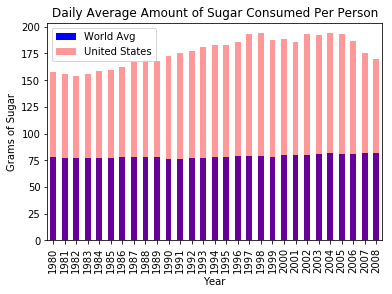

In [11]:
df_sugar2.mean().plot(kind='bar', color='blue', label='World Avg', legend=True)

united_states_sugar.plot(kind='bar', alpha=0.4, color='red', label='United States', legend=True)

plt.title("Daily Average Amount of Sugar Consumed Per Person")
plt.xlabel("Year")
plt.ylabel("Grams of Sugar");

As previously explained, this bar graph shows the significantly high amount of sugar consumed in the United States compared to the world average. 

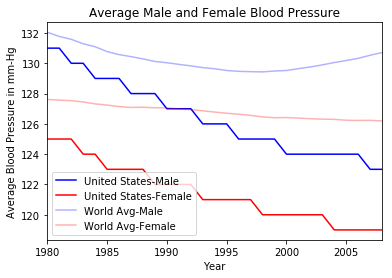

In [14]:
usa_men_bp = df_bp_men2.iloc[133][1:].apply(float)
usa_women_bp = df_bp_women2.iloc[133][1:].apply(float)

usa_men_bp.plot(color='blue', label='United States-Male', legend=True)
usa_women_bp.plot(color='red', label='United States-Female', legend=True)
df_bp_men2.mean().plot(alpha=0.3, color='blue', label='World Avg-Male', legend=True)
df_bp_women2.mean().plot(alpha=0.3, color='red', label='World Avg-Female', legend=True)
plt.title("Average Male and Female Blood Pressure")
plt.xlabel("Year")
plt.ylabel("Average Blood Pressure in mm-Hg");

The graph clearly shows that the blood pressure for men and women in the United States falls significantly below the world average. Although sugar intake is significantly higher in the United States, this does not seem to translate into high blood pressure. 

### What is the relationship between the amount of sugar in a country and average BMI in men and women?

The graph of sugar is provided again below for ease of comparison in this section. We will now determine whether or not the high sugar intake in the United States has an impact on avergae BMI in both men and women. 

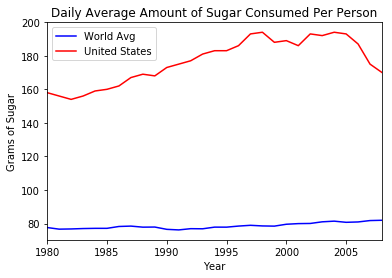

In [6]:
df_sugar2.mean().plot(color='blue', label='World Avg', legend=True)

united_states_sugar.plot(color='red', label='United States', legend=True)

plt.title("Daily Average Amount of Sugar Consumed Per Person")
plt.xlabel("Year")
plt.ylabel("Grams of Sugar");

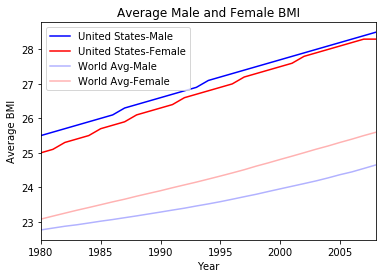

In [3]:
usa_men_bmi = df_bmi_men2.iloc[133][1:].apply(float)
usa_women_bmi = df_bmi_women2.iloc[133][1:].apply(float)

usa_men_bmi.plot(color='blue', label='United States-Male', legend=True)
usa_women_bmi.plot(color='red', label='United States-Female', legend=True)
df_bmi_men2.mean().plot(alpha=0.3, color='blue', label='World Avg-Male', legend=True)
df_bmi_women2.mean().plot(alpha=0.3, color='red', label='World Avg-Female', legend=True)
plt.title("Average Male and Female BMI")
plt.xlabel("Year")
plt.ylabel("Average BMI");

The average BMI for men and women is significantly higher in the United States than the world average. Because the amount of sugar is much higher in the United States, this could be a contributing factor to the high BMI average. To further explore this effect, the trends for BMI and amount of sugar will be compared for the United States. 

The Series for the amount of sugar in the United States, the male BMI in the United States, and the female BMI in the United States will be combined into a single dataframe using the .concat() function.

In [ ]:
sugar_bmi= pd.concat([united_states_sugar, usa_men_bmi, usa_women_bmi], axis=1)
sugar_bmi.columns = ['sugar', 'bmi_male', 'bmi_female']
sugar_bmi.head()

Now, this new Dataframe can be used to create graphs that show the correlation between the amount of sugar in the United States and the average BMI. 

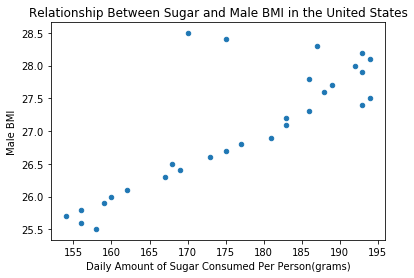

In [23]:
#Test correlation between male BMI and sugar
sugar_bmi.plot(x='sugar', y='bmi_male', kind='scatter')
plt.xlabel("Daily Amount of Sugar Consumed Per Person(grams)")
plt.ylabel("Male BMI")
plt.title("Relationship Between Sugar and Male BMI in the United States");

There is a clear positive correlation between the amount of sugar consumed  and the average BMI for men in the United States.

In [ ]:
#Test correlation between female BMI and sugar
sugar_bmi.plot(x='sugar', y='bmi_female', kind='scatter')
plt.xlabel("Daily Amount of Sugar Consumed Per Person(grams)")
plt.ylabel("Female BMI")
plt.title("Relationship Between Sugar and Female BMI in the United States");

There is also a strong, positive correlation between the amount of sugar consumed and the average BMI for women in the United States.

The .corr method may be used to provide a more accurate calculation of the correlation between sugar and BMI. 

In [12]:
usa_men_bmi.corr(united_states_sugar)

0.82674965724087124

In [13]:
usa_women_bmi.corr(united_states_sugar)

0.83316226739776611

Both male BMI and female BMI have strong, positive correlations with the amount of sugar consumed. The female BMI has a slightly stronger correltation. 

<a id='conclusions'></a>
## Conclusions

It is clear that the United States has a very high consumption of sugar, far above the daily reccommended amount. Although sugar may be a cause of high blood pressure, the average blood pressure in the United States falls below the world average, despite the fact that the average consumption of sugar in the United States is far greater than the world average. 

Meanwhile, the average BMI of both men and women is reflective of the higher amount of sugar consumed in the United States. The average BMI for both genders is higher than the world average. Additionally, when running correlation tests, it is determined that there is a strong, positive correlation between BMI and the amount of sugar consumed. 

While these tests provide a general idea of the relationship between the amount of sugar consumed, BMI and blood pressure, it should be noted that there are limitations to this study, and there are areas where the study could be improved. Although the data for BMI and blood pressure was divided by gender, the amount of sugar consumed was not divided by gender. This may affect the data when comparing the amount of sugar consumed and the BMI/blood pressure of a single gender. Additionally, the world average was not as accurate as it could have been had the data been provided for all countries. Removing the countries with null values may have skewed the average values. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])